 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns

whale_returns_data = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

whale_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [3]:
# Count nulls

# Show information of the Whale Returns File
# This option also shows null values
print(whale_returns.info())

# Count Nulls in each column
whale_returns.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB
None


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls

whale_returns_final = whale_returns.dropna()


# Confirms there aren't any nulls in data
whale_returns_final.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_data = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

# View algo_returns data
algo_returns.head(10)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [6]:
# Count nulls
# algo_returns info
print(algo_returns.info())
algo_returns.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB
None


Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_final = algo_returns.dropna()

# Show updated information
algo_returns_final.isnull().sum()

#algo_returns_final.head(20)

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_data = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

print(sp500_history.info())
sp500_history.head(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB
None


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
2019-04-15,$2905.58
2019-04-12,$2907.41
2019-04-11,$2888.32
2019-04-10,$2888.21


In [9]:
# Check Data Types
sp500_history.dtypes


Close    object
dtype: object

In [10]:
# Fix Data Types
# Drop the "$" sign
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "", regex=True)

# Change Data Types from Object to Int
sp500_history["Close"] = sp500_history["Close"].astype("float")

# Check Data Types
sp500_history.dtypes

sp500_history.head(10)


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
2019-04-15,2905.58
2019-04-12,2907.41
2019-04-11,2888.32
2019-04-10,2888.21


In [11]:
# Calculate Daily Returns
sp500_history['Close'] = sp500_history['Close'].pct_change()
sp500_history.head(10)

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
2019-04-12,0.000630
2019-04-11,-0.006566
2019-04-10,-0.000038


In [12]:
# Drop nulls
sp500_history = sp500_history.dropna()
sp500_history.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history = sp500_history.rename(columns={
    "Close":"S&P500"
})

sp500_history.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [14]:
display(sp500_history, algo_returns_final, whale_returns_final)

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
Combine_Portfolios = pd.concat([sp500_history, algo_returns_final, whale_returns_final], axis="columns", join="inner")
#Combine_Portfolios = pd.concat([sp500_history, Combine_Portfolios], axis="columns", join="inner")
Combine_Portfolios.head()

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-22,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-15,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

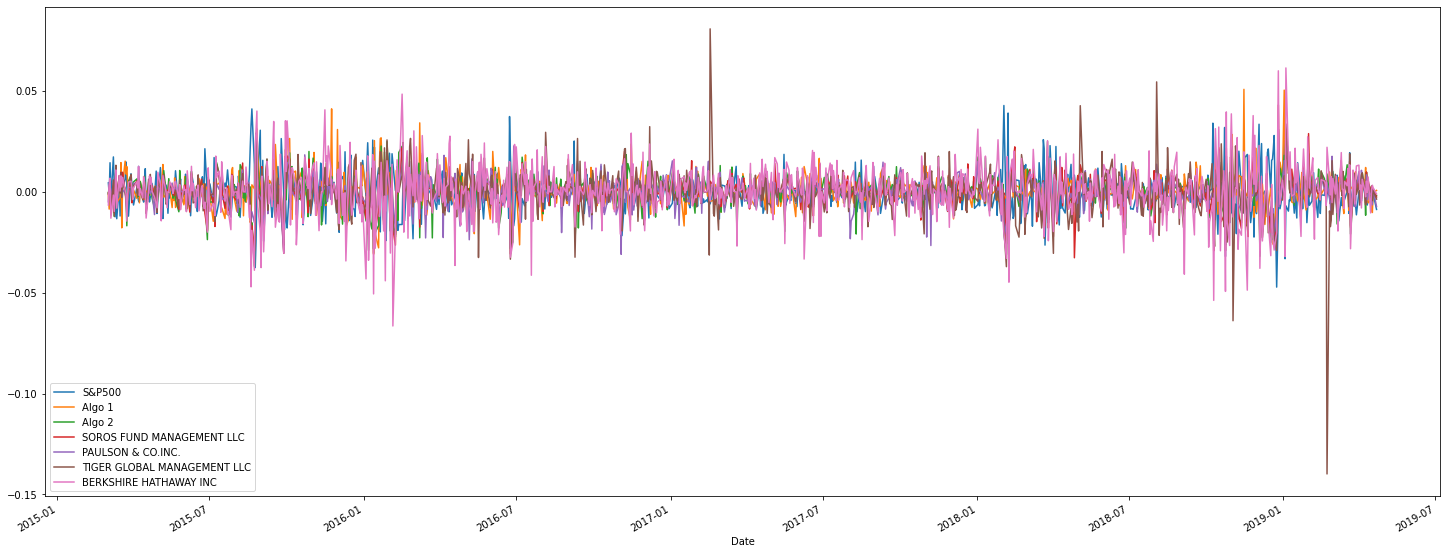

In [16]:
# Plot daily returns of all portfolios
Combine_Portfolios.plot(figsize=(25,10))


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

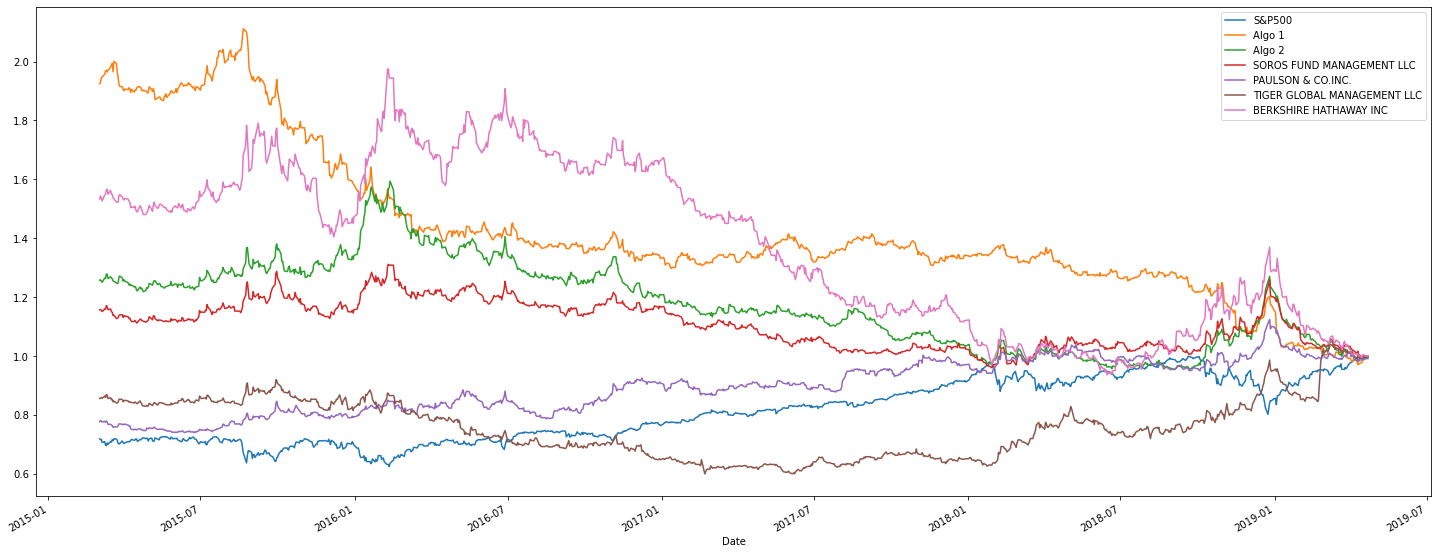

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + Combine_Portfolios).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(25,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

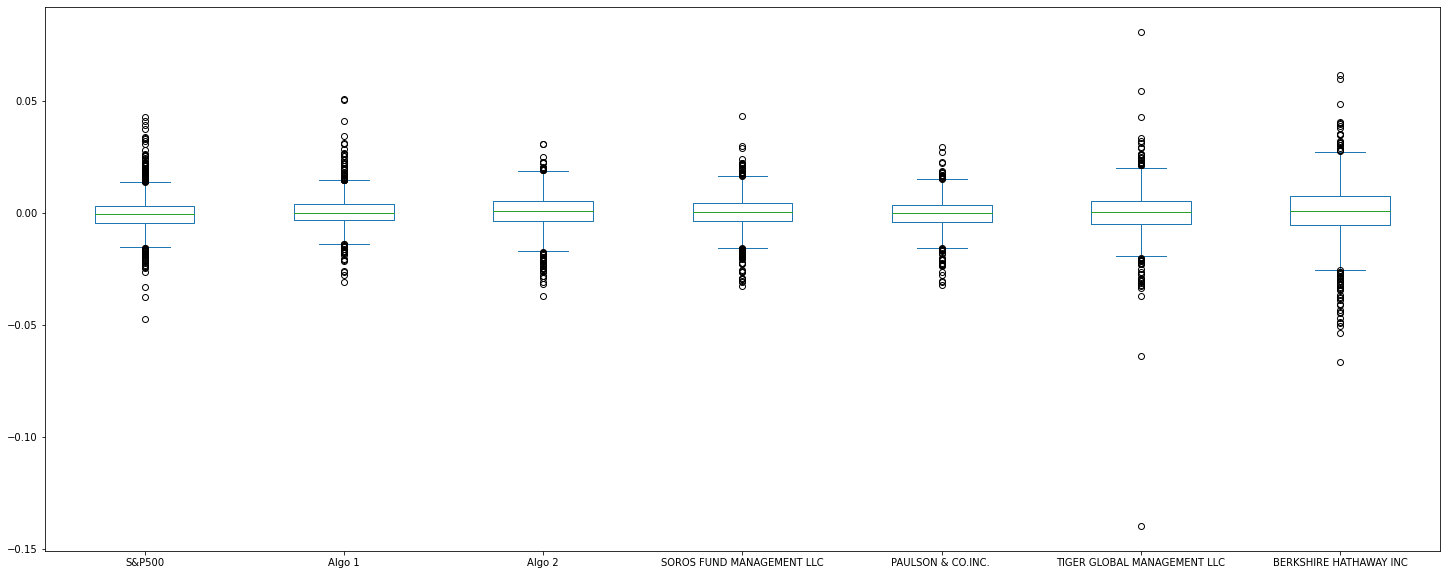

In [18]:
# Box plot to visually show risk
Combine_Portfolios.plot(kind='box', figsize=(25,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
Combine_Portfolios_std = Combine_Portfolios.std()

Combine_Portfolios_std.head()

S&P500                       0.008587
Algo 1                       0.007623
Algo 2                       0.008341
SOROS FUND MANAGEMENT LLC    0.007896
PAULSON & CO.INC.            0.007026
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500

sp500_std = round(Combine_Portfolios['S&P500'].std(),6)
print(sp500_std)

# Determine which portfolios are riskier than the S&P 500

print(f'... Portfolios Riskier Than S&P500 Are True...')
Combine_Portfolios_std > sp500_std

0.008587
... Portfolios Riskier Than S&P500 Are True...


S&P500                         False
Algo 1                         False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annual_cal = 252

def get_annualized_std(df):
    return df.std() * annual_cal

get_annualized_std(Combine_Portfolios)

S&P500                         2.163896
Algo 1                         1.920918
Algo 2                         2.101991
SOROS FUND MANAGEMENT LLC      1.989840
PAULSON & CO.INC.              1.770430
TIGER GLOBAL MANAGEMENT LLC    2.746121
BERKSHIRE HATHAWAY INC         3.255526
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

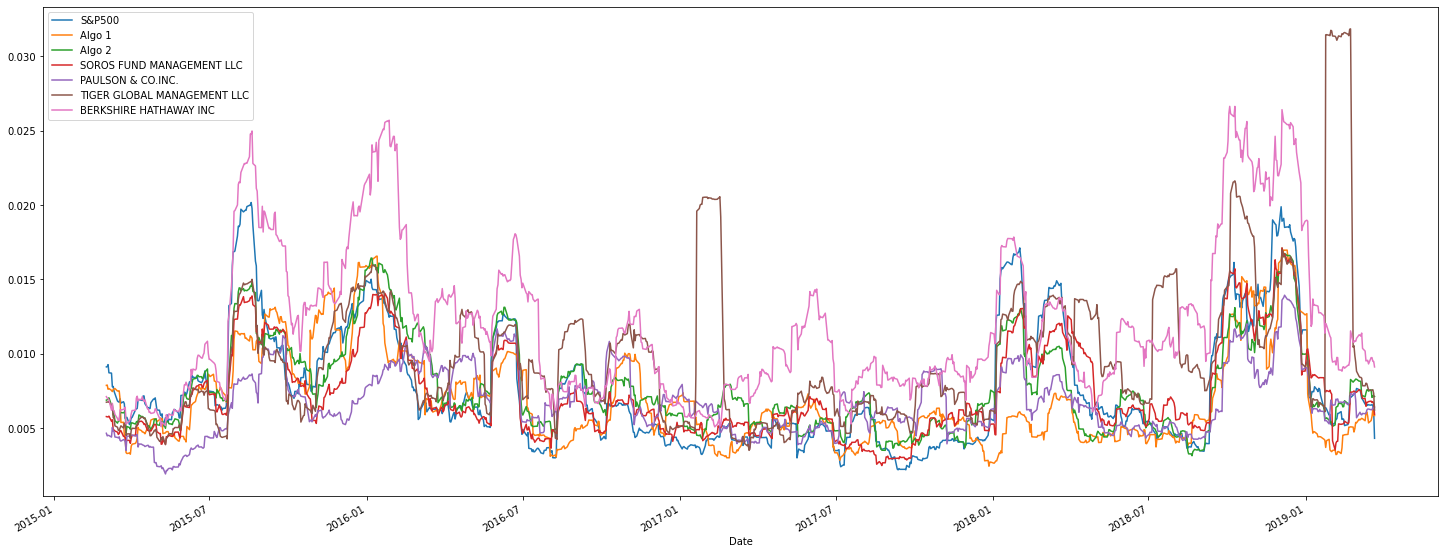

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
calculate_rolling_std = lambda df: df.rolling(window=21).std()

Combine_Portfolios.rolling(window=21).std()

# Plot the rolling standard deviation
Combine_Portfolios.rolling(window=21).std().plot(figsize=(25,10))

### Calculate and plot the correlation

In [23]:
# Calculate the correlation
Combine_Portfolios_Correlation = Combine_Portfolios.corr()
# Display de correlation matrix
display(Combine_Portfolios_Correlation)

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
S&P500,1.000000,-0.033963,-0.002192,0.000574,0.013549,-0.001505,-0.013856
Algo 1,-0.033963,1.000000,0.287852,0.320901,0.268631,0.164114,0.291678
Algo 2,-0.002192,0.287852,1.000000,0.826730,0.678085,0.507160,0.687756
SOROS FUND MANAGEMENT LLC,0.000574,0.320901,0.826730,1.000000,0.699823,0.561040,0.754157
PAULSON & CO.INC.,0.013549,0.268631,0.678085,0.699823,1.000000,0.434308,0.545451
TIGER GLOBAL MANAGEMENT LLC,-0.001505,0.164114,0.507160,0.561040,0.434308,1.000000,0.424125
BERKSHIRE HATHAWAY INC,-0.013856,0.291678,0.687756,0.754157,0.545451,0.424125,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta of Algo 1 Portfolio'}, xlabel='Date'>

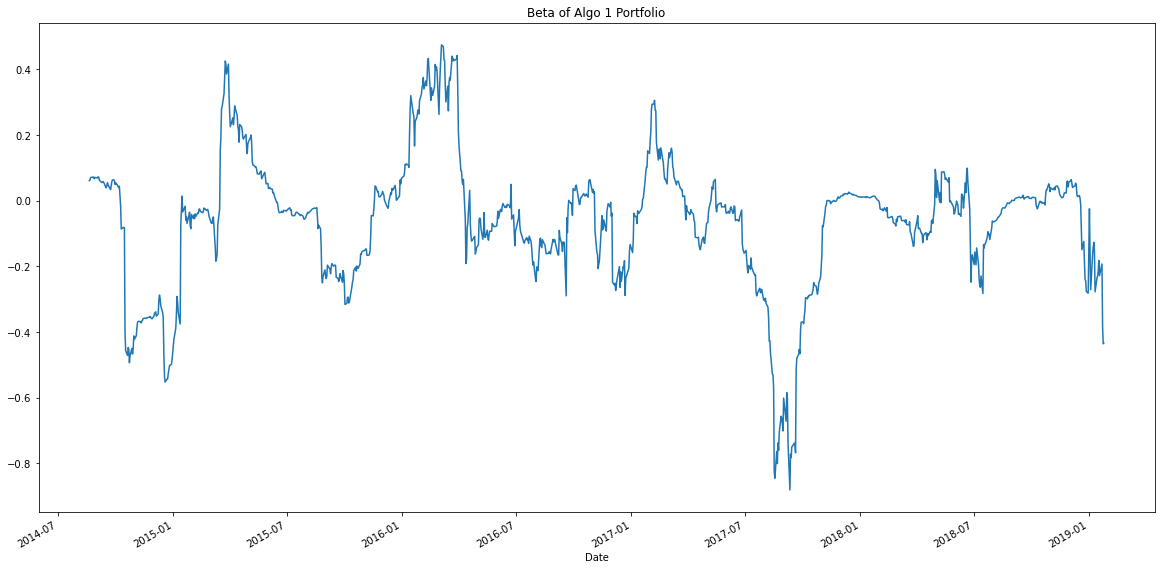

In [24]:
# Calculate covariance of a single portfolio
covariance_Algo1_SnP500 = algo_returns['Algo 1'].rolling(window=60).cov(sp500_history['S&P500'])
covariance_Algo1_SnP500
# Calculate variance of S&P 500
variance_SnP500 = sp500_history['S&P500'].rolling(window=60).var()
variance_SnP500
# Computing beta
Algo1_beta = covariance_Algo1_SnP500 / variance_SnP500
Algo1_beta
# Plot beta trend
Algo1_beta.plot(figsize=(20, 10), title='Beta of Algo 1 Portfolio')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [25]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
Combine_Portfolios.ewm(halflife=21).std()

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-18,0.005482,0.000894,0.000500,0.002852,0.006049,0.002985,0.002124
2019-04-17,0.004284,0.006048,0.002154,0.002427,0.004701,0.002695,0.002201
2019-04-16,0.004613,0.005196,0.003396,0.002845,0.004460,0.002341,0.001805
2019-04-15,0.004031,0.004463,0.003273,0.002498,0.003920,0.002304,0.005599
...,...,...,...,...,...,...,...
2015-03-09,0.008122,0.006658,0.006406,0.005669,0.004448,0.006252,0.007262
2015-03-06,0.008019,0.006621,0.006645,0.005783,0.004445,0.006363,0.007540
2015-03-05,0.008306,0.006516,0.006583,0.005725,0.004415,0.006269,0.007514


In [27]:
# Annualized Sharpe Ratios Continue
def get_annualized_sharpe_ratios(df):
    sharpe_ratios = df.mean()/df.std()*annual_cal
    print(sharpe_ratios)
    return(sharpe_ratios)

S&P500                         -8.232237
Algo 1                         21.741551
Algo 2                          7.688569
SOROS FUND MANAGEMENT LLC       5.443266
PAULSON & CO.INC.              -7.801088
TIGER GLOBAL MANAGEMENT LLC    -2.066644
BERKSHIRE HATHAWAY INC          9.631739
dtype: float64


<AxesSubplot:>

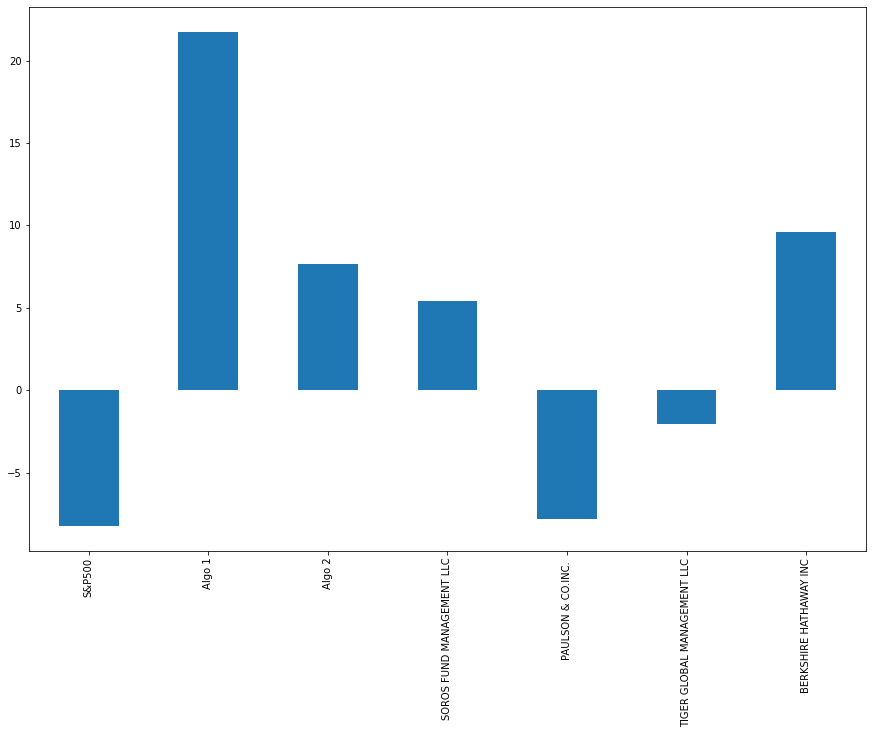

In [28]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios = get_annualized_sharpe_ratios(Combine_Portfolios)
annualized_sharpe_ratios.plot(kind='bar', figsize=(15,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Based on the analysis above, we can conclude that the Algo 1 strategy outperforms both of the S&P 500 and all of the Whales portfolios. Algo 2, however, underperform Berkshire Hathaway Inc, making it a less lucrative portfolio. However, I can would recommend to invest in both Algo1 and Algo 2 as they both perform better than the overall market and has a positive correlation to Algo 1.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Reading data from 1st stock
tsla_data = Path("Resources/tsla_historical.csv")
tsla_df = pd.read_csv(tsla_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
tsla_df.head()

,Close
Date,
2018-01-02,21.37
2018-01-03,21.15
2018-01-04,20.97
2018-01-05,21.11
2018-01-08,22.43


In [30]:
# Reading data from 2nd stock
msft_data = Path("Resources/msft_historical.csv")
msft_df = pd.read_csv(msft_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
msft_df.head()

,Close
Date,
2018-01-02,85.95
2018-01-03,86.35
2018-01-04,87.11
2018-01-05,88.19
2018-01-08,88.28


In [31]:
# Reading data from 3rd stock
amd_data = Path("Resources/amd_historical.csv")
amd_df = pd.read_csv(amd_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
amd_df.head()

,Close
Date,
2018-01-02,10.98
2018-01-03,11.55
2018-01-04,12.12
2018-01-05,11.88
2018-01-08,12.28


In [32]:
# Combine all stocks in a single DataFrame
combine_df = pd.concat([tsla_df, msft_df, amd_df], axis="columns", join="inner")
combine_df.head()
# print(amd_df.shape, msft_df.shape, tsla_df.shape)

,Close,Close,Close
Date,,,
2018-01-02,21.37,85.95,10.98
2018-01-03,21.15,86.35,11.55
2018-01-04,20.97,87.11,12.12
2018-01-05,21.11,88.19,11.88
2018-01-08,22.43,88.28,12.28


In [33]:
# Reset Date index
combine_df.sort_index()

,Close,Close,Close
Date,,,
2018-01-02,21.37,85.95,10.98
2018-01-03,21.15,86.35,11.55
2018-01-04,20.97,87.11,12.12
2018-01-05,21.11,88.19,11.88
2018-01-08,22.43,88.28,12.28
...,...,...,...
2019-05-07,16.47,125.52,26.66
2019-05-08,16.32,125.51,27.09
2019-05-09,16.13,125.50,27.21


In [34]:
# Reorganize portfolio data by having a column per symbol
combine_df.columns = ['TSLA', 'MSFT', 'AMD']
combine_df.head()

,TSLA,MSFT,AMD
Date,,,
2018-01-02,21.37,85.95,10.98
2018-01-03,21.15,86.35,11.55
2018-01-04,20.97,87.11,12.12
2018-01-05,21.11,88.19,11.88
2018-01-08,22.43,88.28,12.28


In [35]:
# Calculate daily returns
combine_df = combine_df.pct_change()
# Drop NAs
combine_dffinal=combine_df.dropna()
combine_dffinal.isnull().sum()


TSLA    0
MSFT    0
AMD     0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_portfolio_returns = combine_dffinal.dot(weights)
# Display sample data
weighted_portfolio_returns.sample()

Date
2018-11-15    0.022589
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns_df = pd.concat([Combine_Portfolios, combine_dffinal], axis=1, join='inner')

portfolio_returns_df.isna().sum()
portfolio_returns_df.head()
# display(Combine_Portfolios, combine_dffinal)


,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,TSLA,MSFT,AMD
Date,,,,,,,,,,
2019-04-22,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088,-0.038419,0.003161,0.018064
2019-04-18,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916,0.007743,0.013140,0.006912
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,-0.007684,0.008280,-0.015754
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,0.025901,-0.002313,0.021954
2019-04-15,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492,-0.005042,0.000827,-0.018671


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns_df=portfolio_returns_df.dropna()
portfolio_returns_df.isna().sum()

S&P500                         0
Algo 1                         0
Algo 2                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
TSLA                           0
MSFT                           0
AMD                            0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`
get_annualized_std(portfolio_returns_df)

S&P500                          2.578356
Algo 1                          1.934886
Algo 2                          2.226192
SOROS FUND MANAGEMENT LLC       2.392080
PAULSON & CO.INC.               1.862768
TIGER GLOBAL MANAGEMENT LLC     3.537520
BERKSHIRE HATHAWAY INC          3.712268
TSLA                            8.964156
MSFT                            4.255578
AMD                            10.187783
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

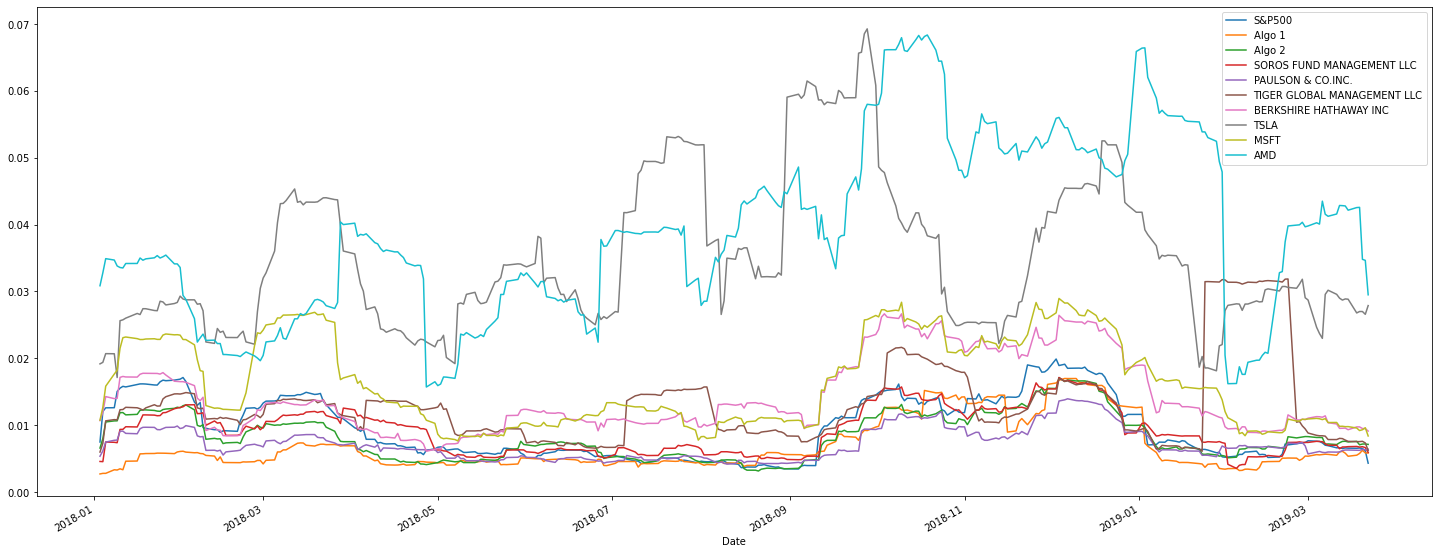

In [40]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolio_returns_df.rolling(window=21).std()

# Plot rolling standard deviation
portfolio_returns_df.rolling(window=21).std().plot(figsize=(25, 10))

### Calculate and plot the correlation

<AxesSubplot:>

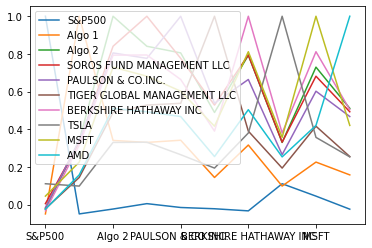

In [41]:
# Calculate and plot the correlation
portfolio_returns_df_corr = portfolio_returns_df.corr()
portfolio_returns_df_corr.plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

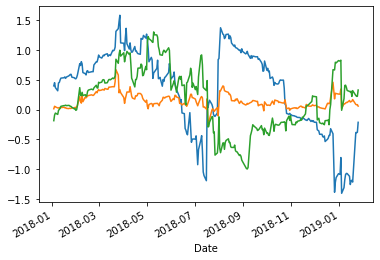

In [42]:
# Calculate Covariance
covariance_tsla = portfolio_returns_df['TSLA'].rolling(window=60).cov(portfolio_returns_df['S&P500'])
covariance_msft = portfolio_returns_df['MSFT'].rolling(window=60).cov(portfolio_returns_df['S&P500'])
covariance_amd = portfolio_returns_df['AMD'].rolling(window=60).cov(portfolio_returns_df['S&P500'])
# Calculate Variance
variance = portfolio_returns_df['S&P500'].rolling(window=60).var()

# Calculate Beta
beta_df_tsla = covariance_tsla / variance
beta_df_msft = covariance_msft / variance
beta_df_amd = covariance_amd / variance

# Plot Beta
beta_df_tsla.plot()
beta_df_msft.plot()
beta_df_amd.plot()


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Calculate Annualized Sharpe Ratios
# Annualized Sharpe Ratios Continue
def get_annualized_sharpe_ratios(df):
    sharpe_ratios = df.mean()/df.std()*annual_cal
    print(sharpe_ratios)
    return(sharpe_ratios)

S&P500                         -4.625068
Algo 1                         30.240470
Algo 2                          2.992809
SOROS FUND MANAGEMENT LLC       1.699706
PAULSON & CO.INC.              -3.693245
TIGER GLOBAL MANAGEMENT LLC   -21.473506
BERKSHIRE HATHAWAY INC          6.297337
TSLA                            0.114630
MSFT                           18.815889
AMD                            23.075685
dtype: float64


<AxesSubplot:>

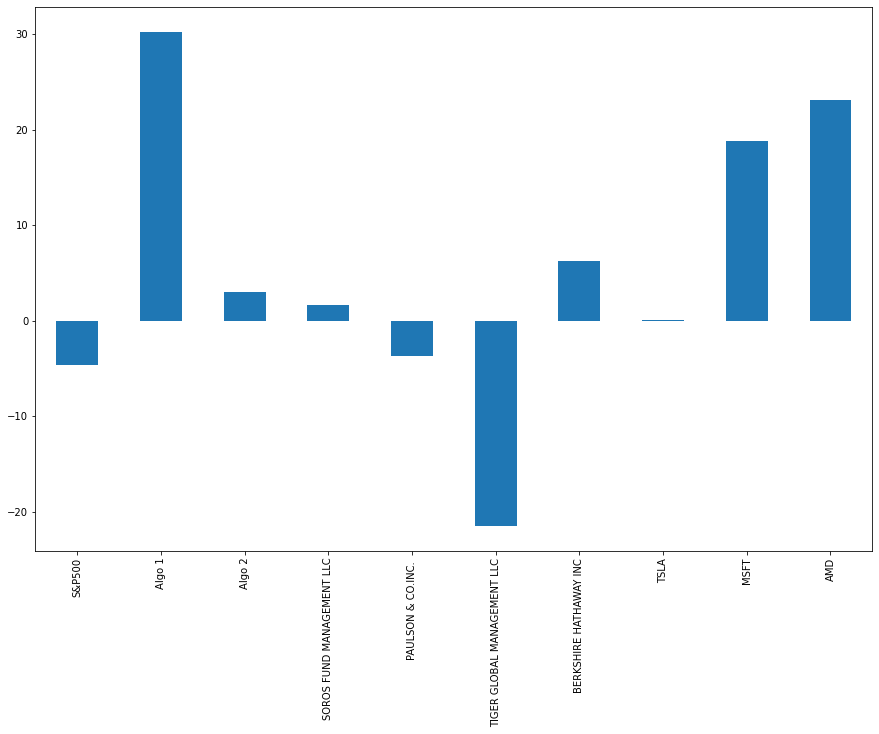

In [45]:
# Visualize the sharpe ratios as a bar plot
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios = get_annualized_sharpe_ratios(portfolio_returns_df)
annualized_sharpe_ratios.plot(kind='bar', figsize=(15,10))

### How does your portfolio do?

Write your answer here!

My portfolio, which was composed of TSLA, MSFT, and AMD, outperformed the S&P 500 from 2018 and 2019. The reason for this, as seen in the analysis above is due to the higher beta and lower sharpe ratios than the S&P500 index. As seen in the sharpe ratio analysis above, AMD is the best performing stock in the portfolio. In comparison with other portfolios, my portfolio has outperformed the majority of other portfolios with the exception of Algo 1.